In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan = pd.read_csv("loan.csv", low_memory=False)

In [3]:
loan = loan[loan.loan_status.isin(['Fully Paid','Default','Charged Off'])]

In [4]:
print(loan.shape)
loan.head()

(1303638, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
100,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_missing = loan.isna()
loan_missing_count = loan_missing.sum()

loan_missing_percentage = (loan_missing_count / len(loan)).round(4) * 100
loan_missing_sorted = loan_missing_percentage.sort_values(ascending=False)
loan_missing_sorted.head(20)

id                                            100.00
next_pymnt_d                                  100.00
member_id                                     100.00
url                                           100.00
orig_projected_additional_accrued_interest     99.74
hardship_reason                                99.59
payment_plan_start_date                        99.59
hardship_type                                  99.59
hardship_status                                99.59
hardship_amount                                99.59
hardship_start_date                            99.59
hardship_end_date                              99.59
deferral_term                                  99.59
hardship_length                                99.59
hardship_last_payment_amount                   99.59
hardship_loan_status                           99.59
hardship_payoff_balance_amount                 99.59
hardship_dpd                                   99.59
sec_app_mths_since_last_major_derog           

In [6]:
temp = [i for i in loan.count()<len(loan)*0.50]
loan.drop(loan.columns[temp],axis=1,inplace=True)
loan.shape

(1303638, 87)

In [7]:
loan["profit_rate"] = loan.apply(lambda x: ((x['total_pymnt'] - x['loan_amnt'])/x['loan_amnt']), axis = 1)

target_class = pd.DataFrame(columns=["class"])
target_class["class"] = [1 if i > 0 else 0 for i in loan["profit_rate"]]
target_class["class"].value_counts()

1    1058405
0     245233
Name: class, dtype: int64

In [8]:
loan.head()
corr = loan.corr()["profit_rate"].sort_values(ascending=False)
print('most positive correlations:\n', corr.head(10))

print('most negative correlations:\n', corr.tail(10))

/var/folders/zv/yzysz_0s5f95rcwhp0snb2w00000gn/T/ipykernel_56018/3382465951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan.corr()["profit_rate"].sort_values(ascending=False)


most positive correlations:
 profit_rate             1.000000
total_rec_prncp         0.466750
total_pymnt             0.428758
total_pymnt_inv         0.428215
total_rec_int           0.254837
last_pymnt_amnt         0.245875
mort_acc                0.062441
avg_cur_bal             0.048943
mths_since_recent_bc    0.044736
mo_sin_rcnt_tl          0.044506
Name: profit_rate, dtype: float64
most negative correlations:
 funded_amnt               -0.029475
loan_amnt                 -0.030520
dti                       -0.052457
total_rec_late_fee        -0.065136
num_tl_op_past_12m        -0.075860
int_rate                  -0.086638
acc_open_past_24mths      -0.094997
collection_recovery_fee   -0.357859
recoveries                -0.386195
policy_code                     NaN
Name: profit_rate, dtype: float64


/var/folders/zv/yzysz_0s5f95rcwhp0snb2w00000gn/T/ipykernel_56018/901233796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(loan["loan_amnt"], ax=ax1)
/var/folders/zv/yzysz_0s5f95rcwhp0snb2w00000gn/T/ipykernel_56018/901233796.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(loan[

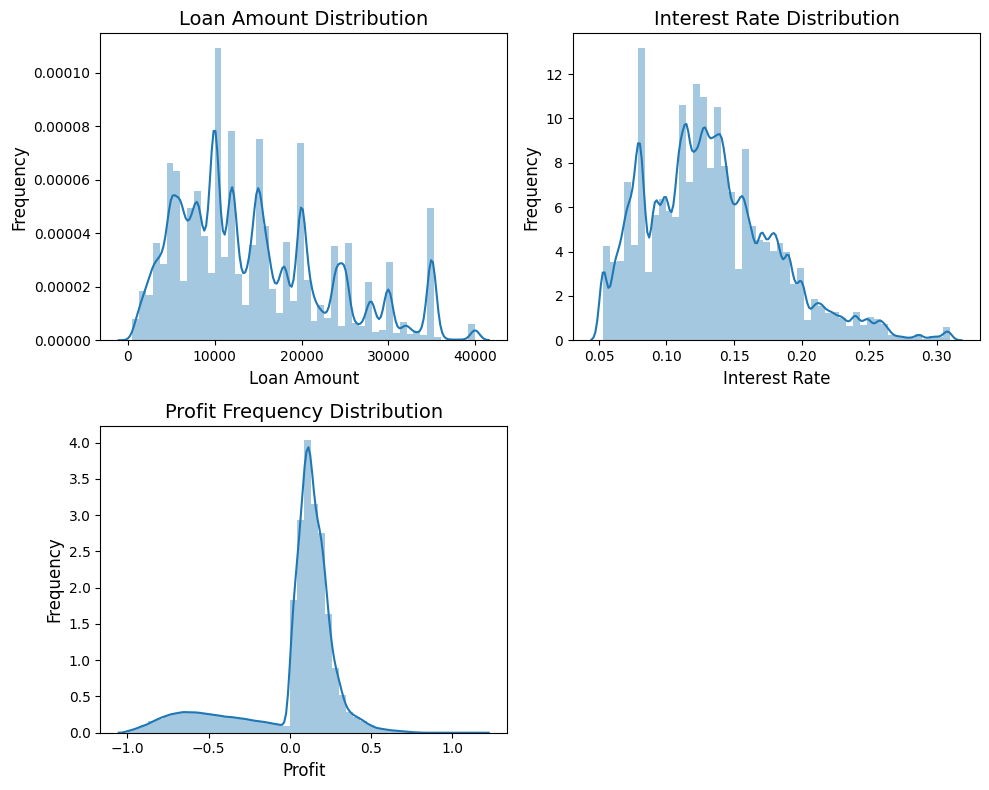

In [9]:
loan["int_rate_dec"] = loan.apply(lambda x: (x["int_rate"]/100), axis = 1)
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(221)
g = sns.distplot(loan["loan_amnt"], ax=ax1)
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
ax1.set_title("Loan Amount Distribution", fontsize=14)


ax2 = fig.add_subplot(222)
g1 = sns.distplot(loan['int_rate_dec'], ax=ax2)
g1.set_xlabel("Interest Rate", fontsize=12)
g1.set_ylabel("Frequency", fontsize=12)
ax2.set_title("Interest Rate Distribution", fontsize=14)


ax3 = fig.add_subplot(223)
g2 = sns.distplot(loan["profit_rate"])
g2.set_xlabel("Profit", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
ax3.set_title("Profit Frequency Distribution", fontsize=14)

fig.tight_layout()


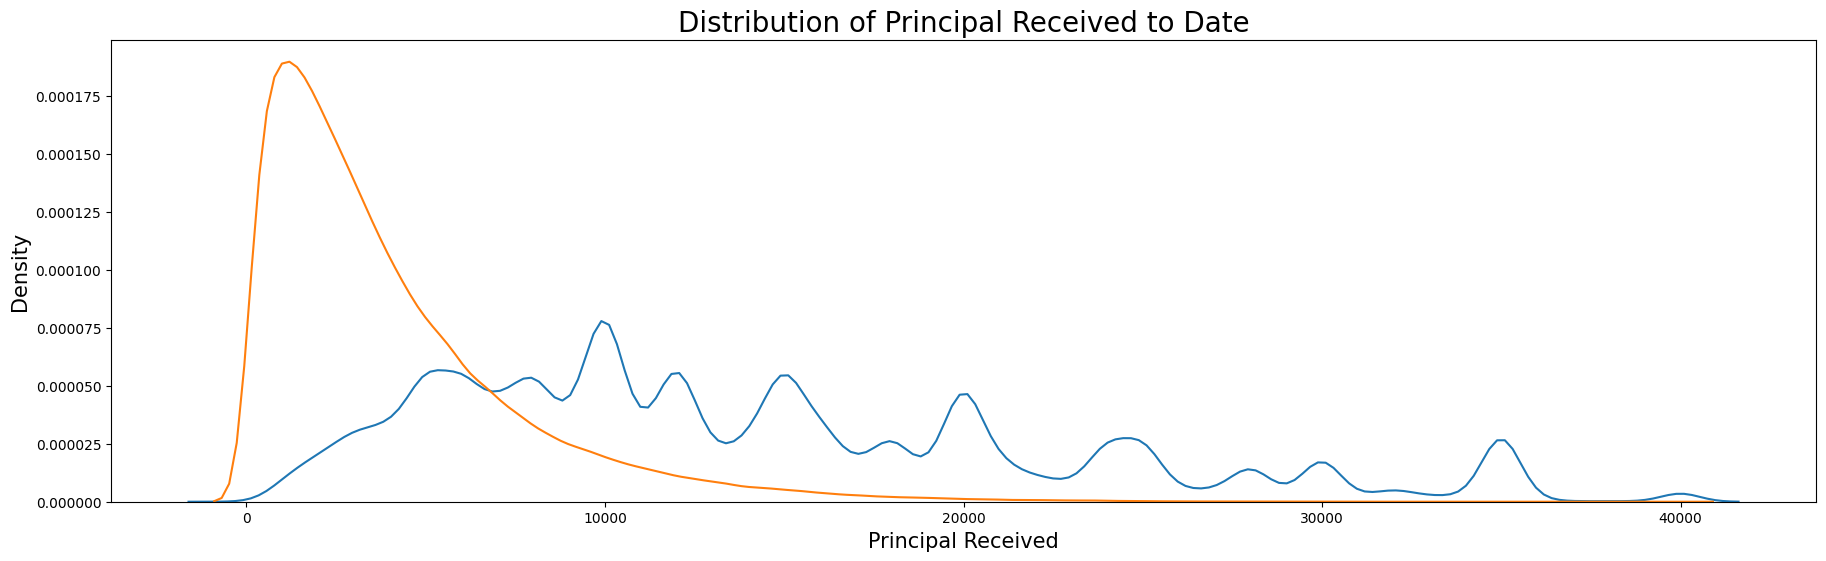

In [10]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(loan.loc[loan['profit_rate'] > 0, 'total_rec_prncp'], label = 'profit rate > 0')
sns.kdeplot(loan.loc[loan['profit_rate'] <= 0, 'total_rec_prncp'], label = 'profit rate <= 0');
plt.xlabel('Principal Received',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Principal Received to Date',fontsize=20);

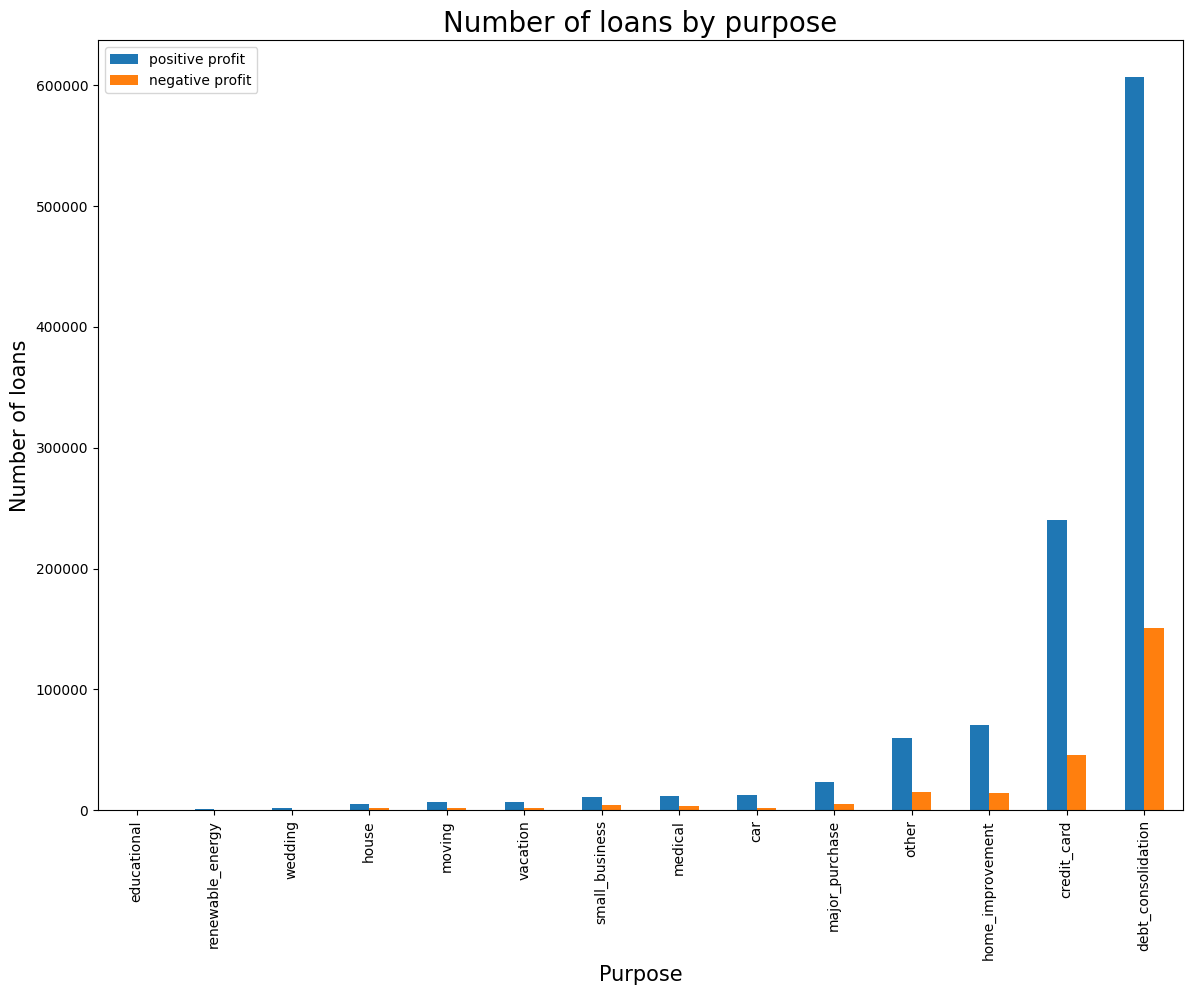

In [12]:
profit_by_purpose = pd.DataFrame(loan[loan['profit_rate']>0].groupby('purpose')['profit_rate'].count().sort_values())
profit_by_purpose["profit_neg"] = pd.DataFrame(loan[loan['profit_rate']<=0].groupby('purpose')['profit_rate'].count().sort_values())["profit_rate"]

fig, ax = plt.subplots(figsize=(14, 10))
profit_by_purpose.plot(kind="bar", ax=ax)
plt.ylabel('Number of loans',fontsize=15)
plt.xlabel('Purpose',fontsize=15)
plt.title('Number of loans by purpose', fontsize=20);
L=plt.legend()
L.get_texts()[0].set_text('positive profit')
L.get_texts()[1].set_text('negative profit')

In [13]:
features = loan[['annual_inc','int_rate','purpose','dti','term','grade']]
features = pd.get_dummies(features)
target = loan[['profit_rate']]

In [14]:
import random
random.seed(100)
idx = random.sample(range(features.shape[0]), 100000)
f_sampled = features.iloc[idx,:]
t_sampled = target.iloc[idx]

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(f_sampled, t_sampled, test_size=0.33, random_state=42)

scaler_trx = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_trx.transform(X_train)

scaler_try = preprocessing.StandardScaler().fit(y_train)
y_train = scaler_try.transform(y_train)

scaler_testx = preprocessing.StandardScaler().fit(X_test)
X_test = scaler_testx.transform(X_test)

scaler_testy = preprocessing.StandardScaler().fit(y_test)
y_test = scaler_testy.transform(y_test)

In [16]:
import pandas as pd
from keras import Model as Model
from keras import Input as Input
from keras.layers import Dropout
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
def architecture(model_type, n_hidden, input_dim, dropout_prob, reg):
    inputs = Input(shape=(input_dim,))
    inter = Dropout(dropout_prob)(inputs, training=True)
    inter = Dense(n_hidden[0], activation='tanh', kernel_regularizer=l2(reg))(inter)
    for i in range(1, len(n_hidden)):
        inter = Dropout(dropout_prob)(inter, training=True)
        inter = Dense(n_hidden[i], activation='tanh', kernel_regularizer=l2(reg))(inter)
    outputs = Dense(1, kernel_regularizer=l2(reg))(inter)
    model = Model(inputs, outputs)
    return model

In [18]:
def model_runner(X_train, y_train,
                dropout_prob=0.20, n_epochs=100, tau=1.0, batch_size=500, 
                lengthscale=1e-2, n_hidden=[100,100]):
  
    input_dim = X_train.shape[1]
    N = X_train.shape[0]
    reg = lengthscale**2 * (1 - dropout_prob) / (2. * N * tau)


    print('McDropout NN fit')

    model_mc_dropout = architecture(model_type = 'mcDropout', 
                                    n_hidden=n_hidden, input_dim=input_dim, 
                                    dropout_prob=dropout_prob, reg=reg)
    model_mc_dropout.compile(optimizer='sgd', loss='mse', metrics=['mae'])
    model_mc_dropout.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=0)


    return model_mc_dropout

In [19]:
def predictor(model_mc_dropout, 
              X_test = X_test, y_test = y_test, T = 100):
    probs_mc_dropout = []
    for _ in range(T):
        probs_mc_dropout += [model_mc_dropout.predict(X_test,verbose=0)]
    predictive_mean = np.mean(probs_mc_dropout, axis=0)
    predictive_variance = np.var(probs_mc_dropout, axis=0)
    mse_mc_dropout = mean_squared_error(predictive_mean, y_test)
    print(mse_mc_dropout)
  
    return probs_mc_dropout


In [20]:
model = model_runner(X_train, y_train)

McDropout NN fit


2024-07-12 03:29:22.661279: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-12 03:29:22.661595: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-12 03:29:22.661603: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-12 03:29:22.661689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-12 03:29:22.661729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-12 03:29:22.916271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [21]:
predictions = predictor(model, X_test, y_test)

2024-07-12 03:35:30.902190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1.0005175871093333


In [22]:
predictions

[array([[ 0.00671614],
        [-0.04357677],
        [ 0.01179794],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=float32),
 array([[-0.0330058 ],
        [ 0.03001228],
        [-0.01470603],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=float32),
 array([[-0.0330058 ],
        [ 0.03001228],
        [-0.01470603],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=float32),
 array([[-0.0330058 ],
        [ 0.03001228],
        [-0.01470603],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=float32),
 array([[-0.0330058 ],
        [ 0.03001228],
        [-0.01470603],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=float32),
 array([[-0.0330058 ],
        [ 0.03001228],
        [-0.01470603],
        ...,
        [-0.04190793],
        [-0.00394195],
        [-0.00509393]], dtype=fl

In [24]:
from scipy.stats import skew, kurtosis

In [25]:
mean_predictions = np.mean(predictions, axis=0)
variance_predictions = np.var(predictions, axis=0)
skewness_predictions = skew(predictions, axis=0)
kurtosis_predictions = kurtosis(predictions, axis=0)


In [26]:
SR_mean = mean_predictions / np.sqrt(variance_predictions)
ASKSR_mean = SR_mean * (1 + skewness_predictions * SR_mean / 6 - (kurtosis_predictions - 3) / 24 * (SR_mean ** 2))


In [31]:
from scipy.stats import kurtosis, skew
import pickle

def optimalCut(x, y):
    max_y = max(y)
    max_x = x[y.index(max_y)]
    return max_x

# Save the profit data to a pickle file
with open('y_test_abs.pickle', 'wb') as file:
    pickle.dump(y_test, file)

# Save the MC Dropout predictions to a pickle file
with open('mc_dropout.pickle', 'wb') as file:
    pickle.dump(predictions, file)

# Load the profit data
profit = np.array(pickle.load(open('y_test_abs.pickle', 'rb')))

# Load the MC Dropout predictions
results = np.array(pickle.load(open('mc_dropout.pickle', 'rb')))

# Create a DataFrame with the required measures
df = pd.DataFrame(
    {'mean': np.mean(results, axis=0)[:, 0],
     'variance': np.var(results, axis=0)[:, 0],
     'skewness': skew(results, axis=0)[:, 0],
     'kurtosis': kurtosis(results, axis=0)[:, 0],
     'Returns': profit[:, 0]
    })

# Calculate additional required measures
df['standardDeviation'] = np.sqrt(df['variance'])
df['SR_mean'] = df['mean'] / df['standardDeviation']
df['ASKSR_mean'] = df['SR_mean'] * (1 + df['skewness'] * df['SR_mean'] / 6 - (df['kurtosis'] - 3) / 24 * (df['SR_mean'] ** 2))

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
df, df_test = train_test_split(df, test_size=0.5, random_state=42)

# Generate a range of ASKSR cut-off values
ASKSR_cutoff_mean = np.linspace(min(df['ASKSR_mean']), max(df['ASKSR_mean']), 10000)

# Calculate profit for each cut-off
ASKSR_profit_mean = []
for i in range(len(ASKSR_cutoff_mean) - 1):
    ASKSR_profit_mean.append(np.mean(df[df['ASKSR_mean'] > ASKSR_cutoff_mean[i]]['Returns']))

# Find the optimal ASKSR cut-off
optimalASKSR_mean = optimalCut(ASKSR_cutoff_mean, ASKSR_profit_mean)

print("The optimal ASKSR cut-off is: ", optimalASKSR_mean)


The optimal ASKSR cut-off is:  -1.8518113991943782e+17
